In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt

## 가상 데이터 생성

In [2]:
X = np.random.random(size = 10).tolist() + (np.random.random(size = 10) + 1).tolist() + (np.random.random(size = 10) + 2).tolist()
Y = [0] * 9 + [1] * 1 + [0] * 2 + [1] * 8 + [0] * 9 + [1] * 1

In [4]:
len(X)

30

In [5]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

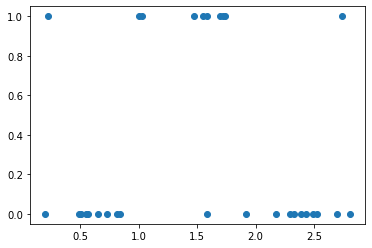

In [6]:
plt.scatter(X, Y)

In [7]:
X = np.array(X)
Y = np.array(Y)

cond = np.logical_and(X > 1, X <= 2)

X_tilda = X.copy()

# X_tilda = X => 사본이 아니라 view를 반환하기 때문. 
X_tilda[cond] = 1
X_tilda[~cond] = 0

In [8]:
X

array([0.50344057, 0.56876239, 0.81836612, 0.7300206 , 0.48859678,
       0.20158895, 0.64918664, 0.84237282, 0.55139419, 0.224356  ,
       1.91880539, 1.58440731, 1.54880153, 1.47021467, 1.00100778,
       1.71725531, 1.69689536, 1.0240359 , 1.74122095, 1.58765585,
       2.32480449, 2.52399729, 2.17881921, 2.38667415, 2.43020155,
       2.49275967, 2.69634047, 2.80626673, 2.29299697, 2.73674566])

In [9]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [10]:
cond

array([False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False])

In [11]:
X_tilda

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 모델 학습

In [12]:
# X는 1차원이어서 sklearn의 인풋 구조와 맞지 않아, reshape를 사용함

model_1 = LR().fit(X.reshape(-1, 1), Y) # model_1: X를 특징을 그대로 사용한 모델
model_2 = LR().fit(X_tilda.reshape(-1, 1), Y) # model_2: 변환한 특징을 사용한 모델

## 결과 시각화

In [13]:
%matplotlib inline

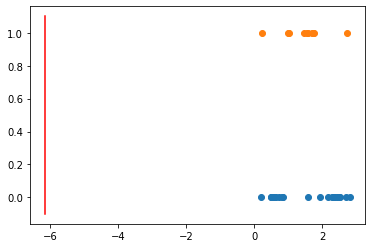

In [15]:
# decision boundary 유도
# Pr(y = 1 | x) >= 0.5
# <=> 1 / (1 + exp(-coef * x - intercept)) >= 0.5
# <=> (1 + exp(-coef * x - intercept)) <= 2
# <=> exp(-coef * x - intercept) <= 1
# <=> -coef * x - intercept <= 0
# <=> x >= - intercept / coef

decision_boundary = (- model_1.intercept_[0] / model_1.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y == 0], Y[Y == 0])
plt.scatter(X[Y == 1], Y[Y == 1])

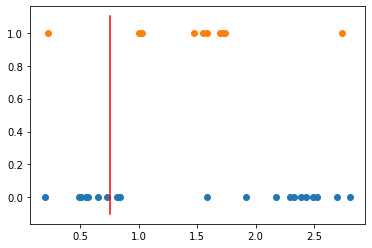

In [26]:
decision_boundary = (- model_2.intercept_[0] / model_2.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y == 0], Y[Y == 0])
plt.scatter(X[Y == 1], Y[Y == 1])